,ticket_no,agent,date,rating
0,0,Sachi,2022-02,4
1,1,Sachi,2022-02,5
2,2,Alex,2022-02,3
3,3,Sachi,2022-02,4
4,4,Zach,2022-02,2
5,5,Aria,2022-02,1
6,6,Sachi,2022-02,4
7,7,Alex,2022-03,4
8,8,Zach,2022-03,3
9,9,Sachi,2022-03,3


Index(['Sachi', 'Zach', 'Alex'], dtype='object', name='agent')


,agent,date,ticket_no,rating
0,Alex,2022-02,1,1
1,Alex,2022-03,2,2
2,Alex,2022-04,1,1
3,Aria,2022-02,1,1
4,Aria,2022-04,2,2
5,Sachi,2022-02,4,4
6,Sachi,2022-03,3,3
7,Sachi,2022-04,1,1
8,Zach,2022-02,1,1
9,Zach,2022-03,1,1


    agent     date  ticket_no  rating
0    Alex  2022-02          1       1
1    Alex  2022-03          2       2
2    Alex  2022-04          1       1
5   Sachi  2022-02          4       4
6   Sachi  2022-03          3       3
7   Sachi  2022-04          1       1
8    Zach  2022-02          1       1
9    Zach  2022-03          1       1
10   Zach  2022-04          3       3


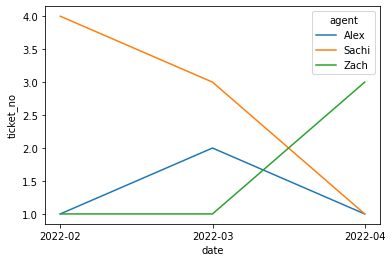

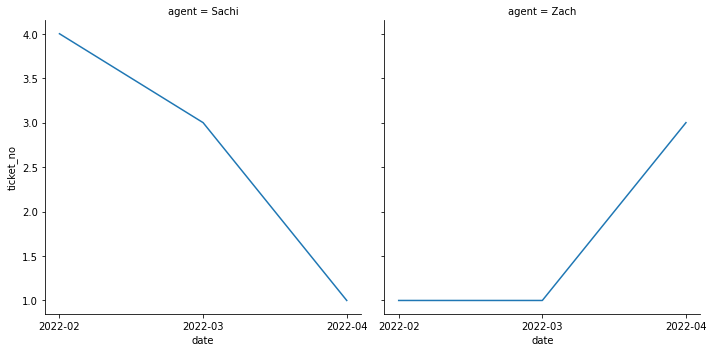

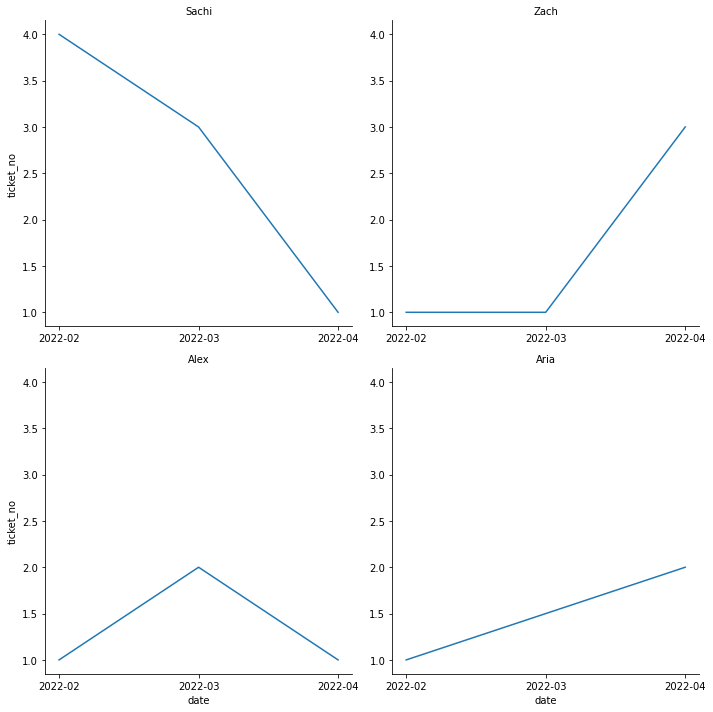

In [3]:
#=========#
# imports #
#=========#

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#===========================#
# begin dummy data creation #
#===========================#

ticket_no = [0,1,2,3,4,
             5,6,7,8,9,
             10,11,12,13,14,
             15,16,17,18,19]

agent = ["Sachi",'Sachi','Alex','Sachi','Zach',
         "Aria",'Sachi',"Alex", "Zach","Sachi",
         "Sachi", "Alex","Sachi","Zach", "Aria",
         "Zach","Sachi","Zach","Aria","Alex"]

date = ['2022-02','2022-02','2022-02','2022-02','2022-02',
        '2022-02','2022-02','2022-03','2022-03','2022-03',
        '2022-03','2022-03','2022-03','2022-04','2022-04',
        '2022-04','2022-04','2022-04','2022-04','2022-04']

rating = [4,5,3,4,2,1,4,4,3,3,5,3,5,3,2,2,4,2,1,3]

data = dict(ticket_no = ticket_no, agent = agent, date = date, rating=rating)
df = pd.DataFrame(data)
display(df)


#==========================#
# groupby dataframe method #
#==========================#

# select the highest x ticket holders
highest_tickets = df.groupby(['agent']).count()['ticket_no'].sort_values(ascending=False)
top_num = 3
top_num_tickets = highest_tickets[:top_num].index # .index because names are our index due to .groupby
print(top_num_tickets)

# group by both agent and date and count values
# as_index = False so that agent and date remain columns and DO NOT become a MultiIndex
date_agg = df.groupby(['agent','date'],as_index=False).count()
display(date_agg)

# # only show highest ticket holder data
date_agg_highest = date_agg[date_agg['agent'].isin(top_num_tickets)] # .isin() checks to see if column vale "is in" list
print(date_agg_highest)

# lines on same axis
sns.lineplot(data=date_agg_highest,x='date',y='ticket_no',hue='agent')

# lines on separate axis, sorted, using only highest values
sns.relplot(data=date_agg, kind='line', x='date', y='ticket_no',col='agent',col_order=highest_tickets.index[:2])


#==============================================#
# When you want to take customization further #
#==============================================#

# assign plot to variable name (convention is 'g' for 'grid')
g = sns.relplot(data=date_agg, kind='line', x='date',y='ticket_no',
                col='agent',col_wrap=2,col_order=highest_tickets.index)


# I hated that it always said agent = Sachi, agent = Alex.  Now it just says Sachi, Alex, etc.
g.set_titles("{col_name}")

# the stupid way we must show the tick vales on ALL axes, not just left and bottom axis
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)
    axis.tick_params(labelbottom=True)
    
# makes spacing between subplots nicer
g.tight_layout()






# names, dates = zip(*date_agg.index)
# names = np.unique(names)
# dates = np.unique(dates)
# print(names)
# print(dates)

# #create the pivot table that formats the data
# '''
# index : pivot table rows
# columns : pivot table columns
# values : what are you aggregating
# aggfunc : how are you aggregating
# fill_value : what to put instead of NaN
# margins : sum or total column/row
# margins_name : what name I give to margins
# '''
# ptable = df.pivot_table(index='date', values='ticket_no', columns='agent', aggfunc=len, fill_value=0, margins=True, margins_name='Total')
# ptable = ptable.reindex(['Feb','Mar','Apr','Total']) #optional because I used strings for month
# display(ptable)


# # sorting and displaying only specified highest amount
# ''' 
# df.last_valid_index() = automatically grabs the final row of df
# axis = horizontal (0) or vertical (1)
# ascending = low to high (True) high to low (False)
# '''
# sorted_df = ptable.sort_values(ptable.last_valid_index(),axis=1,ascending=False)
# highest = 2
# top_tickets = sorted_df[sorted_df.columns[1:highest+1]]
# top_tickets = top_tickets.drop('Total')
# display(top_tickets)

# # plotting one agent time series
# for name in top_tickets.columns:
#     fig, ax = plt.subplots()
#     sns.lineplot(x=top_tickets.index,y=top_tickets[name])
    
# fig, ax = plt.subplots()
# sns.lineplot(data=df, x=date,hue=agent)
    
    
# # plotting group bar chart of monthly tickets
# fig,ax = plt.subplots()
# sns.countplot(data = df, x=date,hue=agent)